# PROJECT OVERVIEW

## 1. Objective
The primary goal of this project is to build a classifier that predicts whether a customer will soon stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem, where the target variable indicates whether a customer churns or not. The insights generated from this project will help SyriaTel to take proactive measures to reduce customer churn, which directly impacts the company’s revenue and profitability.

## 2. Business Understanding:
Customer churn is a critical issue for telecommunications companies like SyriaTel, as acquiring new customers is often more costly than retaining existing ones. By identifying customers who are likely to churn, SyriaTel can implement targeted retention strategies, such as offering discounts or personalized services, to keep those customers from leaving. The aim is to minimize revenue loss and enhance customer satisfaction.

The project focuses on identifying patterns in customer behavior that indicate the likelihood of churn. These patterns can include factors like customer service interactions, usage metrics, and contract details. The goal is to create a predictive model that can classify customers as churners or non-churners with high accuracy, enabling the company to intervene before a customer leaves.

## 3.Data Understanding:
The dataset, titled "Churn in Telecom's dataset," contains information on customers, including various features related to customer demographics, account information, usage metrics, and more. The key challenge is to understand how these features contribute to the likelihood of a customer churning.

Features: These include demographic data (e.g., age, gender), service usage metrics (e.g., number of calls, data usage), customer service interactions, contract details (e.g., contract type, tenure), and payment methods.
Target Variable (y): The target variable is binary, indicating whether a customer has churned or not.
Class Distribution: It's essential to assess the distribution of the target variable to understand if the dataset is balanced or if one class (e.g., churners) is underrepresented.

## 4.Data Preparation:



4.1 Importing the necessary libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

4.2 Load the Dataset

In [15]:
df = pd.read_csv('Data/Churn_in_Telecoms_dataset.csv')

4.3 Display the First Few Rows

In [16]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0   

4.4 Check for Missing Values

In [17]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


This shows that there no missing values in our data

4.5 Summary Statistics

 This is to provides summary statistics for numerical columns, including count, mean, standard deviation, min, max, and quartiles. 

In [18]:
print("\nSummary statistics of the dataset:")
print(df.describe())


Summary statistics of the dataset:
       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std

4.6 Check Data Types

To list all columns in the dataset and the data type of each column

In [19]:
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


4.7 Target Variable Distribution

In [21]:
print("\nDistribution of the target variable (Churn):")
print(df['churn'].value_counts(normalize=True))


Distribution of the target variable (Churn):
False    0.855086
True     0.144914
Name: churn, dtype: float64


This shows that the majority of customers are not churning at 85.5%, while only 14.5% are churning.

4.8 Visualizing the Target Variable

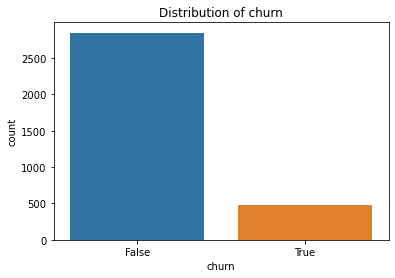

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Distribution of churn')
plt.show()

This clearly shows that who are not churning are more by far than those churning which reflecting a real world scenario as far as customer churn data is concerned.

4.9 Distribution of Numerical Features

In [24]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

Plotting Numerical Distributions.

Below are plots of histograms for all numerical features

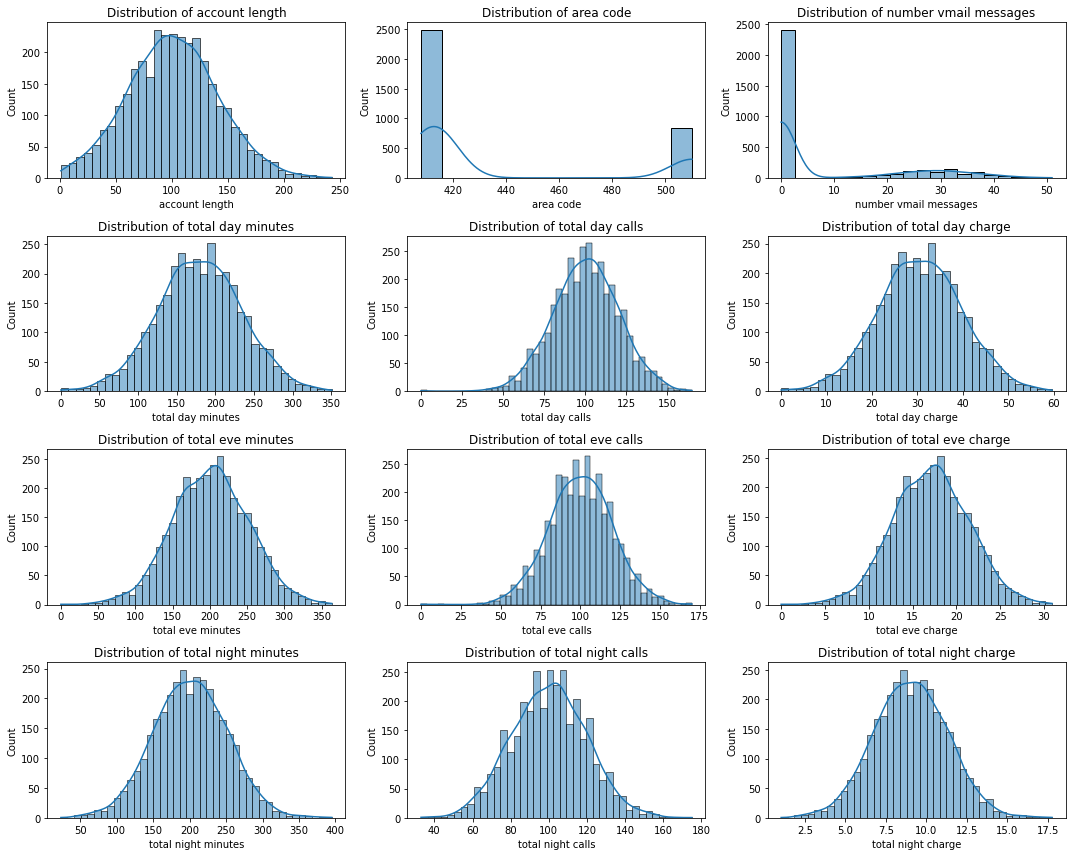

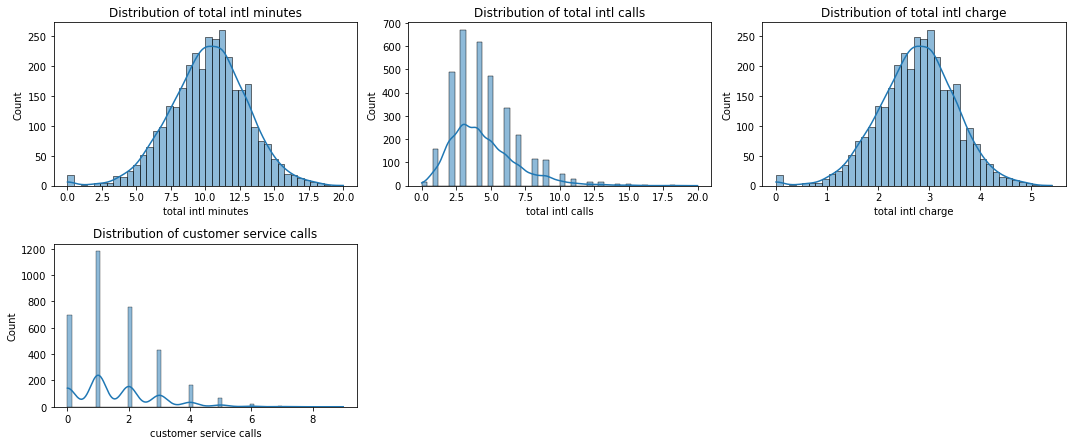

In [27]:
import math

num_features = len(numerical_features)
num_plots_per_figure = 12
num_figures = math.ceil(num_features / num_plots_per_figure)

for fig_num in range(num_figures):
    plt.figure(figsize=(15, 12))
    start_idx = fig_num * num_plots_per_figure
    end_idx = min(start_idx + num_plots_per_figure, num_features)
    for i in range(start_idx, end_idx):
        plt.subplot(4, 3, i - start_idx + 1)
        sns.histplot(df[numerical_features[i]], kde=True)
        plt.title(f'Distribution of {numerical_features[i]}')
    plt.tight_layout()

4.10 Correlation Matrix.

 The correlation matrix below, shows the pairwise correlations between numerical features. This helps identify which features are strongly related to each other or to the target variable.

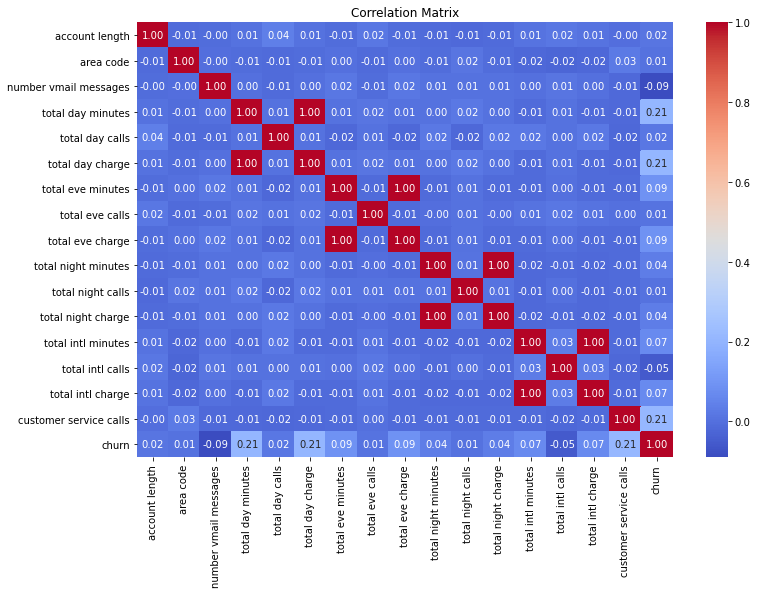

In [28]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

4.11 Checking for outlier using boxplots

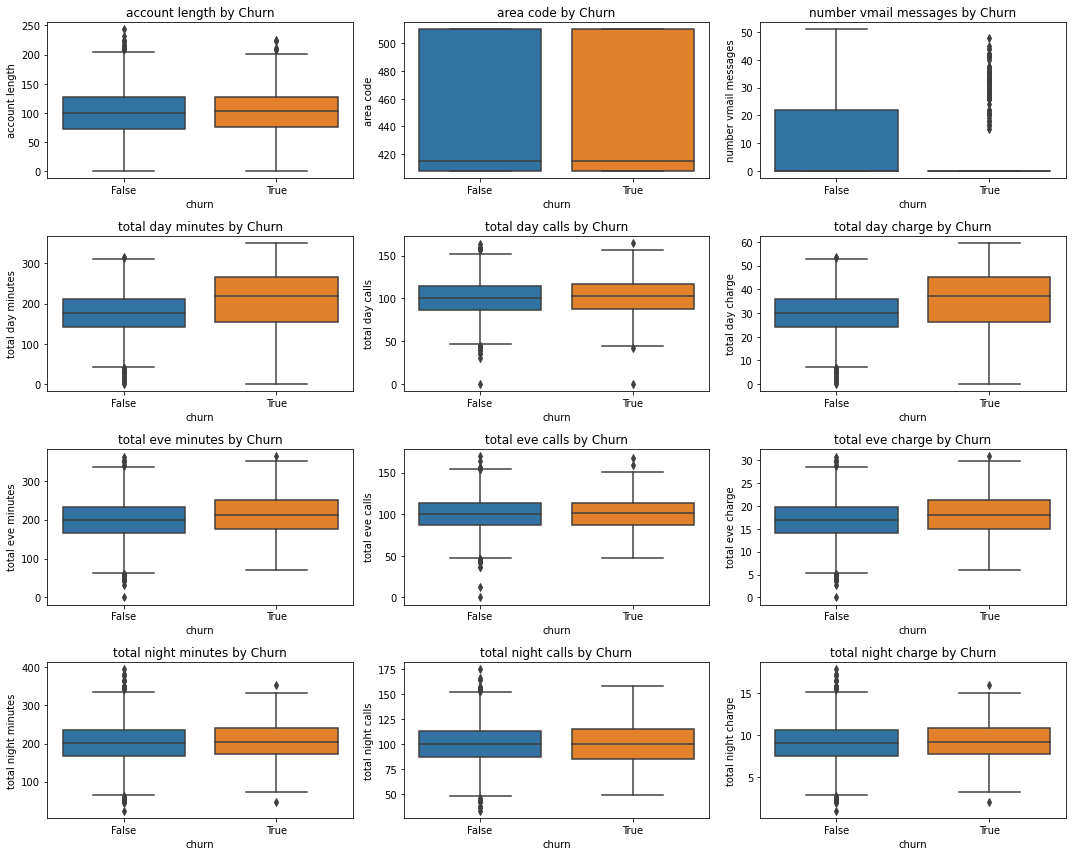

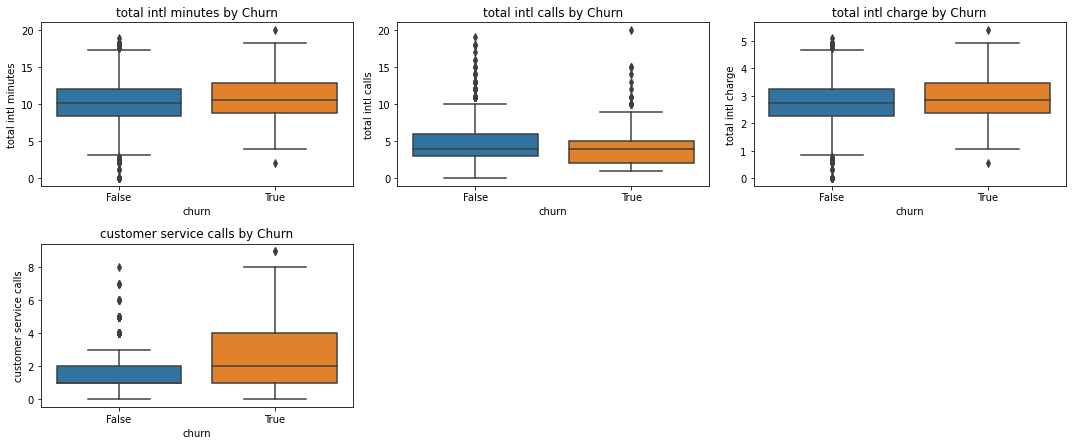

In [31]:
import math

num_features = len(numerical_features)
num_plots_per_figure = 12
num_figures = math.ceil(num_features / num_plots_per_figure)

for fig_num in range(num_figures):
    plt.figure(figsize=(15, 12))
    start_idx = fig_num * num_plots_per_figure
    end_idx = min(start_idx + num_plots_per_figure, num_features)
    for i in range(start_idx, end_idx):
        plt.subplot(4, 3, i - start_idx + 1)
        sns.boxplot(x='churn', y=numerical_features[i], data=df)
        plt.title(f'{numerical_features[i]} by Churn')
    plt.tight_layout()

These plots shows there are quite a number of outliers in almost all the features other than than area code

4.11 Distribution of Categorical Features

In [32]:
## Creating a list of categorical feature names.
categorical_features = df.select_dtypes(include=[object]).columns.tolist()

Plotting Categorical Distributions

Calculating the distribution of each categorical feature. This gives insight into the frequency of each category.

Creating bar plots for each categorical feature, showing the count of each category. This helps in visualizing the distribution of categorical data.


Distribution of state:
WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
OR    0.023402
OH    0.023402
WI    0.023402
WY    0.023102
VA    0.023102
CT    0.022202
MI    0.021902
ID    0.021902
VT    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
KS    0.021002
MD    0.021002
MT    0.020402
NC    0.020402
NJ    0.020402
CO    0.019802
WA    0.019802
NV    0.019802
MA    0.019502
MS    0.019502
RI    0.019502
AZ    0.019202
FL    0.018902
MO    0.018902
ND    0.018602
ME    0.018602
NM    0.018602
OK    0.018302
DE    0.018302
NE    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
HI    0.015902
TN    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: state, dtype: float64


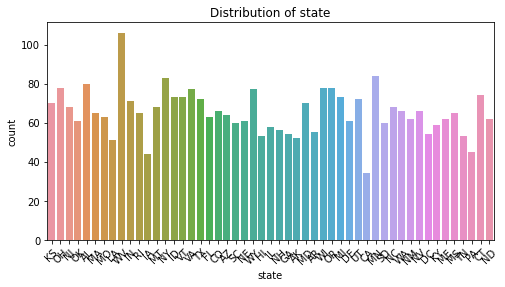


Distribution of phone number:
344-5766    0.0003
397-9148    0.0003
371-8452    0.0003
408-6302    0.0003
421-8141    0.0003
             ...  
333-9643    0.0003
382-9447    0.0003
397-5060    0.0003
356-3403    0.0003
417-4456    0.0003
Name: phone number, Length: 3333, dtype: float64


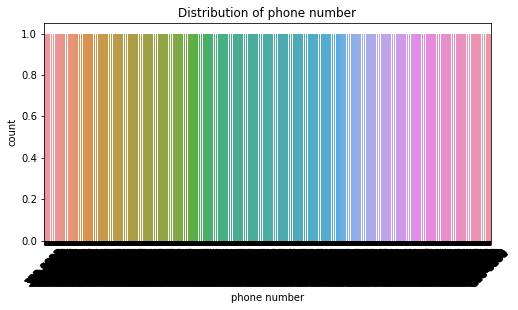


Distribution of international plan:
no     0.90309
yes    0.09691
Name: international plan, dtype: float64


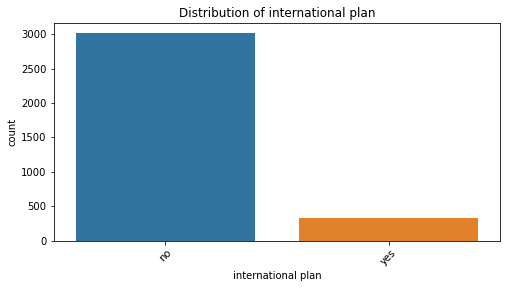


Distribution of voice mail plan:
no     0.723372
yes    0.276628
Name: voice mail plan, dtype: float64


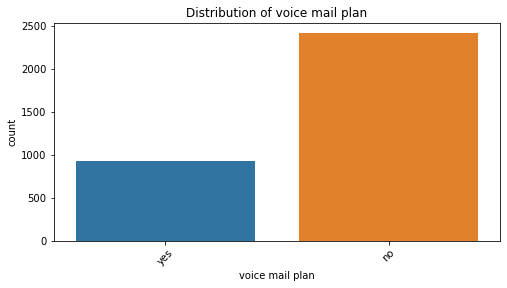

In [37]:
for feature in categorical_features:
    print(f"\nDistribution of {feature}:")
    print(df[feature].value_counts(normalize=True))

    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()


Churn Rate by Categorical Features

Createing a cross-tabulation of categorical features and churn, showing the proportion of churn within each category.

Creating a stacked bar chart, showing the churn rate across different categories of a feature. This helps identify which categories are more prone to churn.


Distribution of state:
WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
OR    0.023402
OH    0.023402
WI    0.023402
WY    0.023102
VA    0.023102
CT    0.022202
MI    0.021902
ID    0.021902
VT    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
KS    0.021002
MD    0.021002
MT    0.020402
NC    0.020402
NJ    0.020402
CO    0.019802
WA    0.019802
NV    0.019802
MA    0.019502
MS    0.019502
RI    0.019502
AZ    0.019202
FL    0.018902
MO    0.018902
ND    0.018602
ME    0.018602
NM    0.018602
OK    0.018302
DE    0.018302
NE    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
HI    0.015902
TN    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: state, dtype: float64


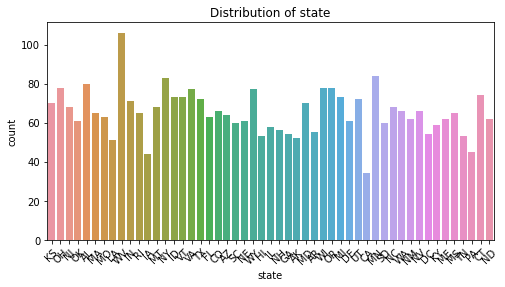


Distribution of phone number:
344-5766    0.0003
397-9148    0.0003
371-8452    0.0003
408-6302    0.0003
421-8141    0.0003
             ...  
333-9643    0.0003
382-9447    0.0003
397-5060    0.0003
356-3403    0.0003
417-4456    0.0003
Name: phone number, Length: 3333, dtype: float64


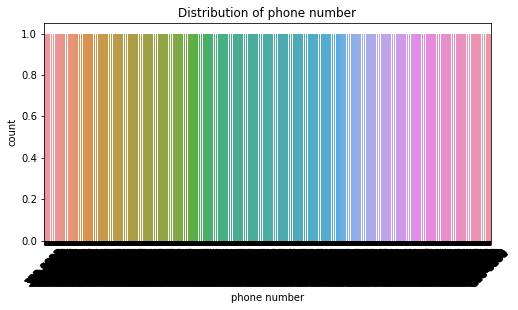


Distribution of international plan:
no     0.90309
yes    0.09691
Name: international plan, dtype: float64


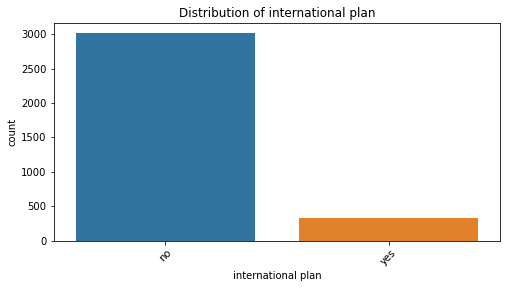


Distribution of voice mail plan:
no     0.723372
yes    0.276628
Name: voice mail plan, dtype: float64


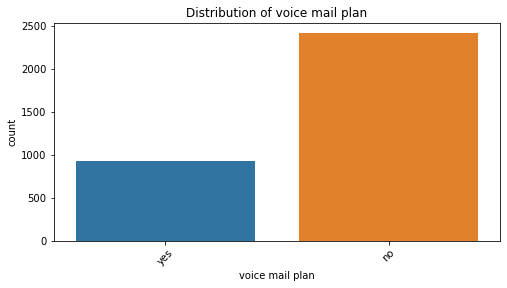

In [38]:
for feature in categorical_features:
    print(f"\nDistribution of {feature}:")
    print(df[feature].value_counts(normalize=True))

    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()


# 5. Modeling

5.1 Importing necessary libriaries

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import seaborn as sns

5.2 Preparing data for modelling

In [40]:
# Defining features and target variable
X = df.drop(columns=['churn'])  # Features (drop 'churn' column)
y = df['churn']  # Target variable

In [43]:
# Identify categorical features
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

In [45]:
# Apply One-Hot Encoding to categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))

c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [46]:
# Combine encoded categorical features with the rest of the dataset
X = X.drop(categorical_features, axis=1)
X = pd.concat([X.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

5.3 Baseline Model (Dummy Classifier)

In [48]:
# Baseline model using the DummyClassifier
baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [49]:
# Make predictions
y_pred_baseline = baseline_model.predict(X_test)

In [52]:
# Evaluate the baseline model
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline)
recall_baseline = recall_score(y_test, y_pred_baseline)
f1_baseline = f1_score(y_test, y_pred_baseline)
confusion_baseline = confusion_matrix(y_test, y_pred_baseline)
roc_auc_baseline = roc_auc_score(y_test, y_pred_baseline)

print(f"Baseline Model - Accuracy: {accuracy_baseline:.4f}, Precision: {precision_baseline:.4f}, Recall: {recall_baseline:.4f}, F1 Score: {f1_baseline:.4f}, ROC-AUC: {roc_auc_baseline:.4f}")
print("Confusion Matrix:\n", confusion_baseline)

Baseline Model - Accuracy: 0.8550, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000, ROC-AUC: 0.5000
Confusion Matrix:
 [[855   0]
 [145   0]]


c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5.4 Logistic Regression Model

In [53]:
# Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
# Make predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]

In [55]:
# Evaluate the logistic regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
confusion_logistic = confusion_matrix(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_pred_proba_logistic)

In [56]:
print(f"Logistic Regression Model - Accuracy: {accuracy_logistic:.4f}, Precision: {precision_logistic:.4f}, Recall: {recall_logistic:.4f}, F1 Score: {f1_logistic:.4f}, ROC-AUC: {roc_auc_logistic:.4f}")
print("Confusion Matrix:\n", confusion_logistic)

Logistic Regression Model - Accuracy: 0.8530, Precision: 0.4167, Recall: 0.0345, F1 Score: 0.0637, ROC-AUC: 0.7181
Confusion Matrix:
 [[848   7]
 [140   5]]


5.5 Decision Tree Model

In [57]:
# Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
# Make predictions
y_pred_tree = tree_model.predict(X_test)
y_pred_proba_tree = tree_model.predict_proba(X_test)[:, 1]

In [59]:

# Evaluate the decision tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
confusion_tree = confusion_matrix(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree)

In [60]:
print(f"Decision Tree Model - Accuracy: {accuracy_tree:.4f}, Precision: {precision_tree:.4f}, Recall: {recall_tree:.4f}, F1 Score: {f1_tree:.4f}, ROC-AUC: {roc_auc_tree:.4f}")
print("Confusion Matrix:\n", confusion_tree)

Decision Tree Model - Accuracy: 0.9410, Precision: 0.8707, Recall: 0.6966, F1 Score: 0.7739, ROC-AUC: 0.8395
Confusion Matrix:
 [[840  15]
 [ 44 101]]


5.6 Plot ROC Curves for All Models

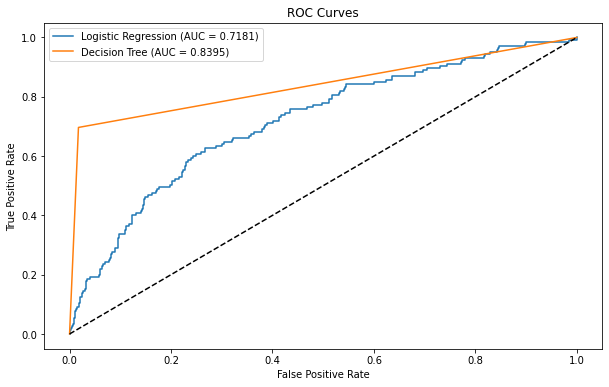

In [61]:
# Plot ROC curves for all models
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_proba_logistic)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_proba_tree)

plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = {:.4f})'.format(roc_auc_logistic))
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (AUC = {:.4f})'.format(roc_auc_tree))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

6. Model Comparison

6.1 comparing models metrics values

In [62]:
# Compare the models
results = pd.DataFrame({
    'Model': ['Baseline', 'Logistic Regression', 'Decision Tree'],
    'Accuracy': [accuracy_baseline, accuracy_logistic, accuracy_tree],
    'Precision': [precision_baseline, precision_logistic, precision_tree],
    'Recall': [recall_baseline, recall_logistic, recall_tree],
    'F1 Score': [f1_baseline, f1_logistic, f1_tree],
    'ROC-AUC': [roc_auc_baseline, roc_auc_logistic, roc_auc_tree]
})

print(results)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0             Baseline     0.855   0.000000  0.000000  0.000000  0.500000
1  Logistic Regression     0.853   0.416667  0.034483  0.063694  0.718104
2        Decision Tree     0.941   0.870690  0.696552  0.773946  0.839504


6.2 Comparison Conclusion

1. Model Performance: The logistic regression and decision tree models both outperform the baseline model across all metrics, as expected. The logistic regression model shows strong performance in precision, recall, and F1 score, making it a reliable model for predicting customer churn. The logistic regression model, while also performing well, may offer better interpretability but shows a slightly lower ROC-AUC score compared to decision tree.

2. Choosing the Best Model: Based on the evaluation metrics, the decision tree is preferred due to its balance between precision and recall and its higher ROC-AUC score. This model would be recommended to SyriaTel for predicting customer churn.